In [2]:
pip install sqldf

^C
Note: you may need to restart the kernel to use updated packages.


### Import

In [4]:
import pandas as pd

In [5]:
import sqldf

In [6]:
import matplotlib.pyplot as plt

### Load dataset

In [7]:
data = pd.read_csv('dataset.csv')

In [8]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,"2,55",17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,"3,39",17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,"2,75",17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,"3,39",17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,"3,39",17850.0,United Kingdom


### Data cleaning

In [15]:
data.CustomerID.fillna(0, inplace=True)

In [17]:
data.dtypes

InvoiceNo      object
StockCode      object
Description    object
Quantity        int64
InvoiceDate    object
UnitPrice      object
CustomerID      int32
Country        object
dtype: object

In [47]:
data['InvoiceDate'] = pd.Timestamp(data.InvoiceDate, tz=None)

TypeError: Cannot convert input [0          12/1/10 8:26
1          12/1/10 8:26
2          12/1/10 8:26
3          12/1/10 8:26
4          12/1/10 8:26
              ...      
541904    12/9/11 12:50
541905    12/9/11 12:50
541906    12/9/11 12:50
541907    12/9/11 12:50
541908    12/9/11 12:50
Name: InvoiceDate, Length: 541909, dtype: object] of type <class 'pandas.core.series.Series'> to Timestamp

In [46]:
data['InvoiceDate'].to_pydatetime()

AttributeError: 'Series' object has no attribute 'to_pydatetime'

In [45]:
data['InvoiceDate']=pd.to_datetime(data.InvoiceDate, format='%Y-%m-%d')
data['InvoiceDate']= data['dt'].InvoiceDate.strftime('%Y-%m-%d')

ValueError: time data 12/1/10 8:26 doesn't match format specified

In [44]:
data.CustomerID=data.CustomerID.astype(int)

### Answers

<H3 style="color:red"> Question 1 </H3>

<h5 style="color: cadetblue"> Nombre de produits achetés par un client généralement </h5>

In [34]:
query_customer = """
    SELECT CustomerID, InvoiceNo, avg(Quantity) as mean
    FROM data
    group by CustomerID, InvoiceNo
"""

In [35]:
df_customer_mean = sqldf.run(query_customer)

In [37]:
df_customer_mean

,CustomerID,InvoiceNo,mean
0,0,536414,56.000000
1,0,536544,2.292220
2,0,536545,1.000000
3,0,536546,1.000000
4,0,536547,1.000000
...,...,...,...
25895,18283,579673,2.576923
25896,18283,580872,2.840000
25897,18287,554065,16.827586
25898,18287,570715,26.052632


<h5 style="color: cadetblue"> Nombre médian de produits acheté lors d’une dépense, par pays </h5>

In [38]:
query = """
SELECT Country, avg(Quantity) as mean
FROM data
group by Country
order by mean desc
"""

In [19]:
df_view = sqldf.run(query)

In [20]:
df_view.head()

,Country,mean
0,Netherlands,84.406580
1,Sweden,77.136364
2,Japan,70.441341
3,Australia,66.444003
4,Singapore,22.855895


In [24]:
test=df_view[df_view.notna()]

In [25]:
x = [df_view.Country]
y = [df_view.mean]

In [26]:
disp = test.head(10)

<AxesSubplot:xlabel='Country'>

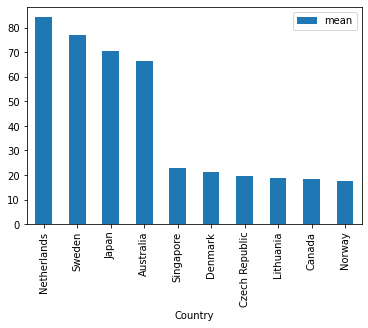

In [27]:
disp.plot(kind='bar',x='Country', y='mean')

<H3 style="color:red"> Question 2 </H3>

In [39]:
query_customer_UnitPrice = """
    SELECT CustomerID, InvoiceNo, avg(UnitPrice) as mean
    FROM data
    group by CustomerID, InvoiceNo
"""

In [40]:
df_customer_mean_price = sqldf.run(query_customer_UnitPrice)

In [42]:
df_customer_mean_price

,CustomerID,InvoiceNo,mean
0,0,536414,0.000000
1,0,536544,5.157495
2,0,536545,0.000000
3,0,536546,0.000000
4,0,536547,0.000000
...,...,...,...
25895,18283,579673,1.057692
25896,18283,580872,0.880000
25897,18287,554065,1.448276
25898,18287,570715,0.789474


<H3 style="color:red"> Question 3 </H3>